##Medication Demand Forecast using Prophet Part I

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import prophet
from prophet import Prophet

In [2]:
df_pharmacy_sales = pd.read_csv('/content/demo_pharmacy_sales_data.csv')
df_pharmacy_sales

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
2,2021-06-15,Methyltestosterone Tablet (10 mg),Androgen Hormone,5,5.9
3,2021-02-19,Buspirone Tablet (5 mg),Anxiolytic,89,55.7
4,2022-09-24,Hydrocodone/Acetaminophen Tablet (5/325 mg),Opioid Analgesic/Analgesic Combination,79,0.7
...,...,...,...,...,...
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3
999998,2021-12-08,Flumazenil Injection (0,Benzodiazepine Antagonist,1,23.9


In [3]:
df_pharmacy_sales[df_pharmacy_sales['Med_class'].str.contains('Anxiolytic')][['Date Sold', 'Quantity Sold']]

,Date Sold,Quantity Sold
3,2021-02-19,89
122,2022-03-01,82
143,2020-08-11,17
327,2020-12-08,86
518,2019-03-31,70
...,...,...
999594,2019-08-11,42
999711,2020-05-16,71
999772,2019-09-02,63
999883,2019-09-09,38


In [4]:
df_prophet = df_pharmacy_sales[df_pharmacy_sales['Med_class'].str.contains('Anxiolytic')][['Date Sold', 'Quantity Sold']]

In [5]:
df_prophet = df_prophet.reset_index()
df_prophet

,index,Date Sold,Quantity Sold
0,3,2021-02-19,89
1,122,2022-03-01,82
2,143,2020-08-11,17
3,327,2020-12-08,86
4,518,2019-03-31,70
...,...,...,...
9999,999594,2019-08-11,42
10000,999711,2020-05-16,71
10001,999772,2019-09-02,63
10002,999883,2019-09-09,38


In [6]:
df_prophet = df_prophet.rename(columns={'Date Sold': 'ds','Quantity Sold':'y'})
df_prophet

,index,ds,y
0,3,2021-02-19,89
1,122,2022-03-01,82
2,143,2020-08-11,17
3,327,2020-12-08,86
4,518,2019-03-31,70
...,...,...,...
9999,999594,2019-08-11,42
10000,999711,2020-05-16,71
10001,999772,2019-09-02,63
10002,999883,2019-09-09,38


In [7]:
type(df_prophet['ds'][0])

str

In [8]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [9]:
type(df_prophet['ds'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
model = Prophet()

In [11]:
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp51y4wlct/nkas14jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp51y4wlct/_rho1kdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95696', 'data', 'file=/tmp/tmp51y4wlct/nkas14jy.json', 'init=/tmp/tmp51y4wlct/_rho1kdc.json', 'output', 'file=/tmp/tmp51y4wlct/prophet_model0suqvc6v/prophet_model-20240127174403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:44:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:44:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

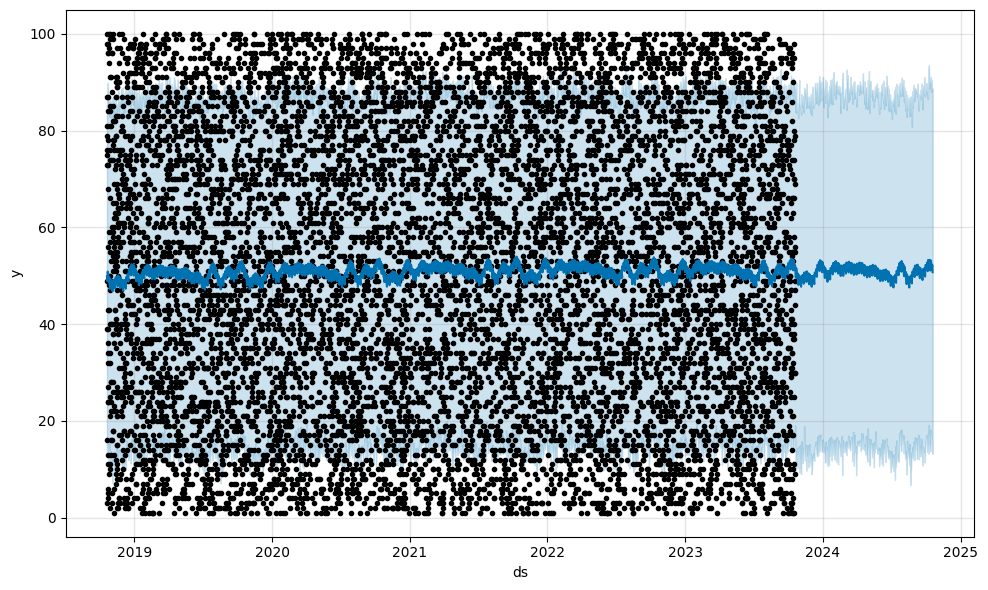

In [13]:
fig = model.plot(forecast)
plt.show()

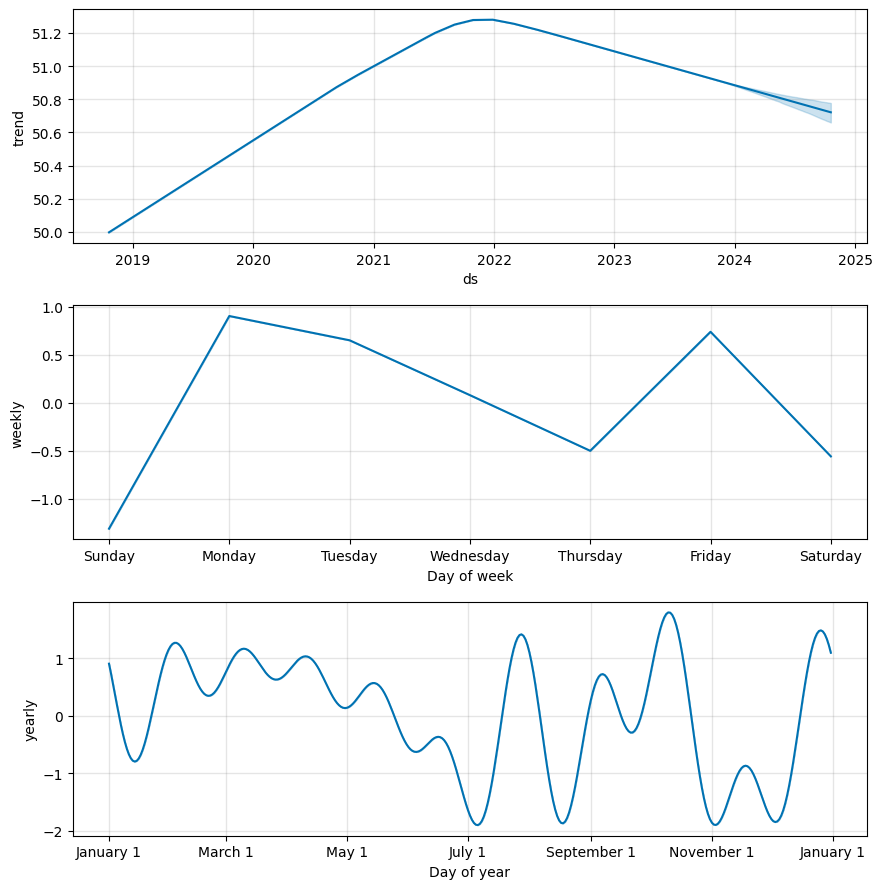

In [14]:
fig = model.plot_components(forecast)
plt.show()

##Medication Demand Forecast using Prophet Part II

In [20]:
def medication_quantity_forecaster(df,med_class=None,med_name=None):
    if med_class:
        df_filtered = df[df['Med_class'].str.contains(med_class)]
    elif med_name:
        df_filtered = df[df['Med_name'].str.contains(med_name)]
    else:
        raise ValueError("Specify either med_name or med_class for filtering")

    df_filtered = df_filtered[['Date Sold','Quantity Sold']].copy()
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.rename(columns={'Date Sold':'ds','Quantity Sold':'y'})
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'])

    model = Prophet()
    model.fit(df_filtered)

    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    fig1 = model.plot(forecast)
    plt.title(f"Medication Quantity Forecast({med_class or med_name})")
    plt.xlabel("Date")
    plt.ylabel("Quantity Sold")
    plt.show()

    fig2 = model.plot_components(forecast)
    plt.show()

    return fig1, fig2




INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp51y4wlct/qdpkg7fk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp51y4wlct/sfj0ikvm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51420', 'data', 'file=/tmp/tmp51y4wlct/qdpkg7fk.json', 'init=/tmp/tmp51y4wlct/sfj0ikvm.json', 'output', 'file=/tmp/tmp51y4wlct/prophet_modelvy43scqh/prophet_model-20240127185449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


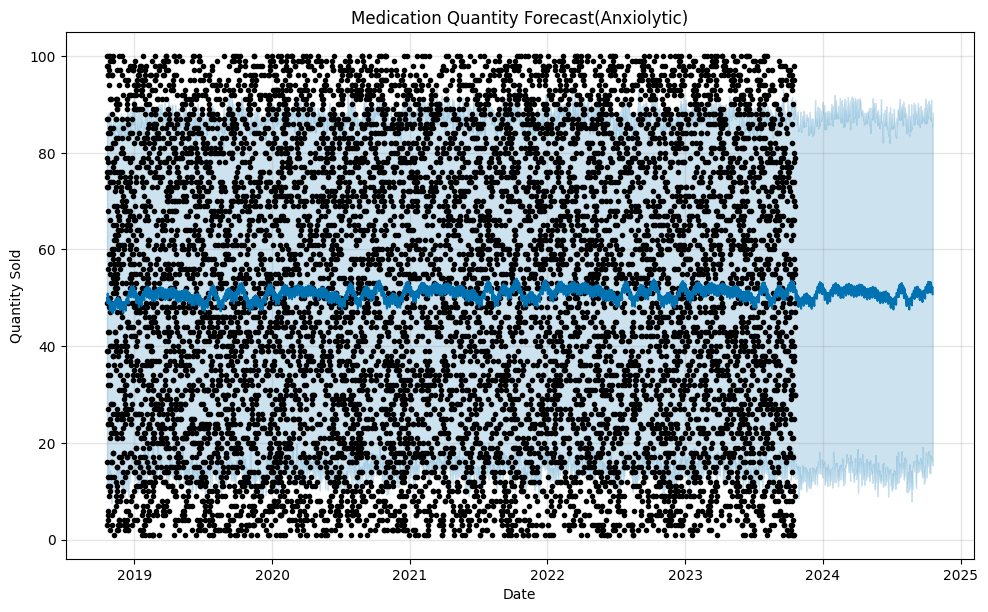

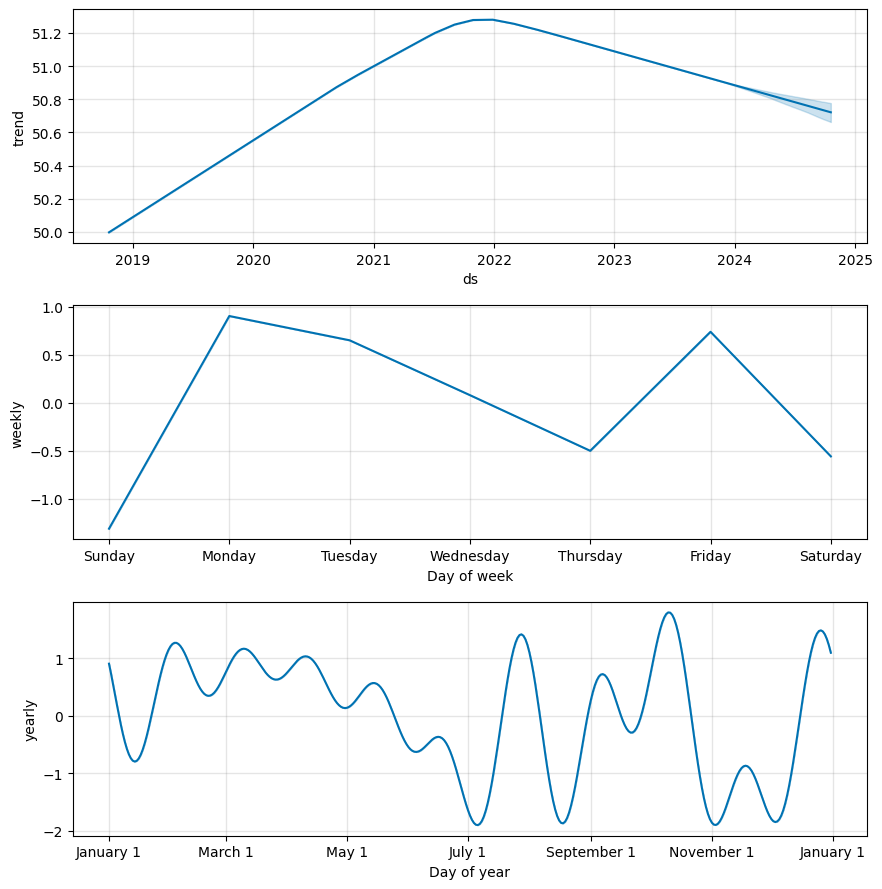

(<Figure size 1000x600 with 1 Axes>, <Figure size 900x900 with 3 Axes>)

In [21]:
medication_quantity_forecaster(df_pharmacy_sales, med_class='Anxiolytic')